<a href="https://colab.research.google.com/github/divyanshuraj6815/eva/blob/master/Project%201/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-04 14:43:41.634080


In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 14:43:44.388891


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 11s 1us/step
2019-09-04 14:44:00.344713


(60000, 28, 28)
2019-09-04 15:06:13.136333


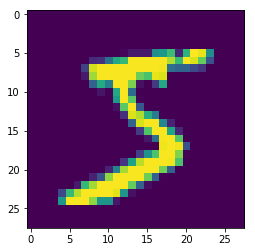

In [15]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 15:06:15.411162


In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 15:06:18.391941


In [18]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 15:06:43.946765


In [19]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 15:06:50.345460


In [20]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 15:06:52.028237


In [25]:
## MAIN BLOCK

from keras import layers, models

img_width = 28
img_height = 28
img_channels = 1

def quiz_7 (x):
  
  def add_common_layers (y):
    y = layers.BatchNormalization ()(y)
    y = layers.Activation ('relu')(y)
    y = layers.Dropout (0.1)(y)
    return y
  
  def addition (y):
    y = layers.Add()(y)
    return y
  
  def conv (y, channel_size, kernel_size, history, count, flag = 1):
    y = layers.Conv2D (channel_size, (kernel_size, kernel_size), strides = (1, 1), padding = 'same')(y)
    if flag == 1:
      y = add_common_layers (y)
    history.append (y)
    count += 1
    return (y, history, count)
  
  def block (y, channel_size):
    history = list ()
    count = 0
    (y, history, count) = conv (y, channel_size, 3, history, count)
    (y, history, count) = conv (addition ([y, history[0]]), channel_size, 3, history, count)
    (y, history, count) = conv (addition ([y, history[0], history[1]]), channel_size, 3, history, count)
    return y
  
  x = block (x, 48)
  x = layers.MaxPooling2D((2, 2))(x)
  x = block (x, 96)
  x = layers.MaxPooling2D((2, 2))(x)
  x = block (x, 192)
  x = layers.Conv2D(10, (7, 7), use_bias=False)(x)
  x = layers.Flatten()(x)
  x = layers.Activation ('softmax')(x)
  
  return x

image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = quiz_7 (image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])
print(model.summary())                  
 
print(datetime.datetime.now())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 28, 28, 48)   480         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 28, 28, 48)   192         conv2d_97[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 28, 28, 48)   0           batch_normalization_92[0][0]     
____________________________________________________________________________________________

In [26]:
model.summary()

print(datetime.datetime.now())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 28, 28, 48)   480         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 28, 28, 48)   192         conv2d_97[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 28, 28, 48)   0           batch_normalization_92[0][0]     
____________________________________________________________________________________________

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-09-04 15:07:28.361813


In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0904 15:07:30.070696 140084753061760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1625 - acc: 0.9579
Epoch 2/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0534 - acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0353 - acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0319 - acc: 0.9906
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0264 - acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0213 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0170 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0166 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0133 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0114 - a

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 15:26:15.516140


In [30]:
print(score)
print(datetime.datetime.now())

[0.025995597126563734, 0.9915]
2019-09-04 15:26:17.903150
